## Get data and store it as an dataframe for further processing steps

Download data file (CSV format) from: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
Saved as raw_data.csv

#### Read data and description from CSV file

In [1]:
# Import pandas library for processing dataframe
import pandas as pd

In [2]:
data = pd.read_csv('data/raw_data.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Cleaning and pre-processing

In [4]:
# Null
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No null detected from this dataframe.

In [5]:
# Duplicate
data.duplicated().value_counts()

False    12205
True       125
dtype: int64

In [6]:
# Remove duplicates and check again
data.drop_duplicates(inplace=True)
data.duplicated().value_counts()

False    12205
dtype: int64

At this step, null and duplicated rows are cleaned.
We continue to work with data types.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

Examine categorical variables unique values:

In [3]:
print('Month values {}\n'.format(data['Month'].unique()))
print('OperatingSystems values {}\n'.format(data['OperatingSystems'].unique()))
print('Browser values {}\n'.format(data['Browser'].unique()))
print('Region values {}\n'.format(data['Region'].unique()))
print('TrafficType values {}\n'.format(data['TrafficType'].unique()))
print('Weekend values {}\n'.format(data['Weekend'].unique()))
print('Revenue values {}\n'.format(data['Revenue'].unique()))

Month values ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

OperatingSystems values [1 2 4 3 7 6 8 5]

Browser values [ 1  2  3  4  5  6  7 10  8  9 12 13 11]

Region values [1 9 2 3 4 5 6 7 8]

TrafficType values [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]

Weekend values [False  True]

Revenue values [False  True]



With Month, it is a collection of strings.
We can see that for OperatingSystems, Browser, Region, and TrafficType, these variables should be categorical ones, although they are displayed using numbers.
Weekend and Revenue are boolean variables with True and False.

To serve later purpose, boolean values should be converted to 0 for False and 1 for True.
The listed categorical as mentioned should be converted to the correct data type as well.

In [4]:
# fix the structure of the data
data['Revenue'] = data['Revenue'].replace({False: '0', True: '1'})
data['Weekend'] = data['Weekend'].replace({False: '0', True: '1'})

# convert to categorical data
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)
data['OperatingSystems'] = data['OperatingSystems'].astype('category')
data['Browser'] = data['Browser'].astype('category')
data['Region'] = data['Region'].astype('category')
data['TrafficType'] = data['TrafficType'].astype('category')
data['VisitorType'] = data['VisitorType'].astype('category')
data['Revenue'] = data['Revenue'].astype('category')
data['Weekend'] = data['Weekend'].astype('category')

# print the structure of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

## Descriptive Analysis

In [5]:
# for numerical variables
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [7]:
# for categorical variables
data.describe(include='category')

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,0,0
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [10]:
# frequency count for categorical variables
print(data['Revenue'].value_counts(), '\n')
print(data['Weekend'].value_counts(), '\n')
print(data['VisitorType'].value_counts(), '\n')
print(data['TrafficType'].value_counts(), '\n')
print(data['Region'].value_counts(), '\n')
print(data['Browser'].value_counts(), '\n')
print(data['OperatingSystems'].value_counts(), '\n')
print(data['Month'].value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64 

0    9462
1    2868
Name: Weekend, dtype: int64 

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64 

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64 

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64 

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64 

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64 

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
F

### Import libraries for visualization purpose

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualize to view frequencies distribution between variables and Revenue

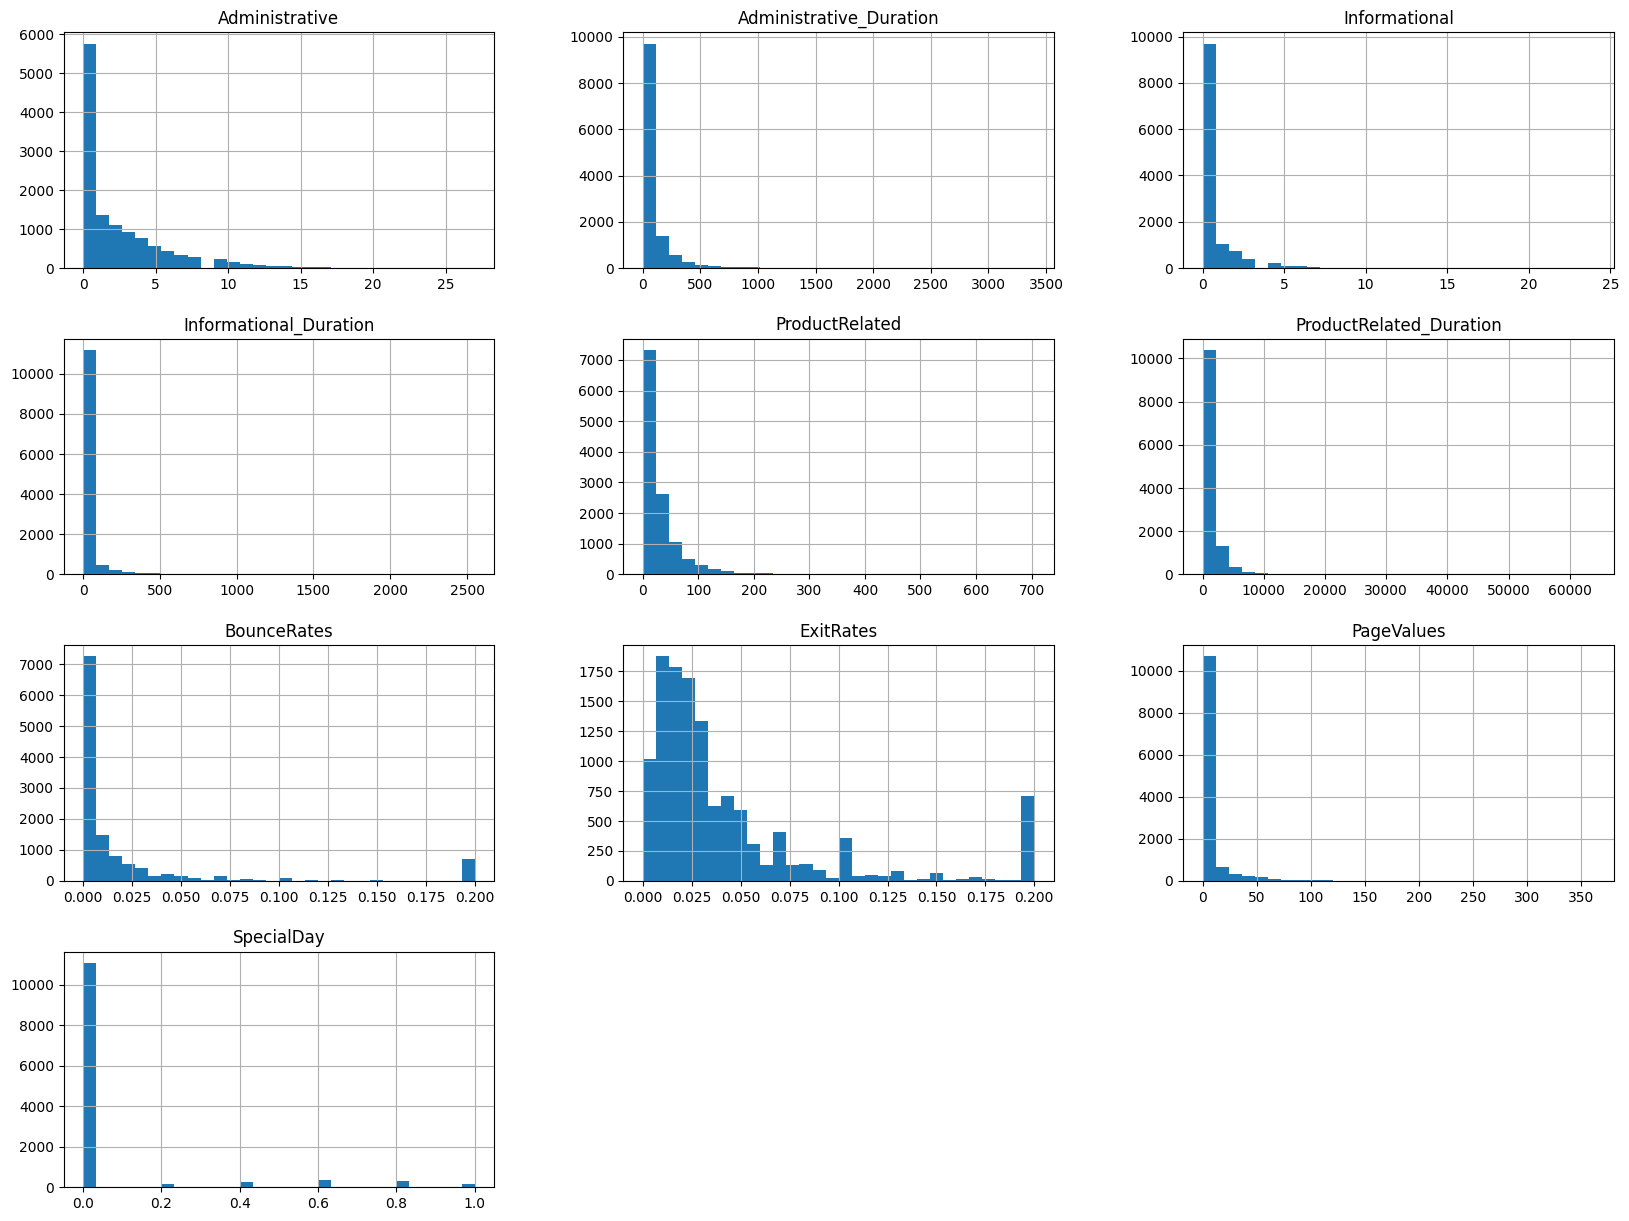

In [12]:
data.hist(bins=30, figsize=(20,15))
plt.show()

In [13]:
# Numerical & Categorical columns
num_cols = [var for var in data.select_dtypes(include=np.number)]
cat_cols = [var for var in data.select_dtypes(exclude=np.number)]

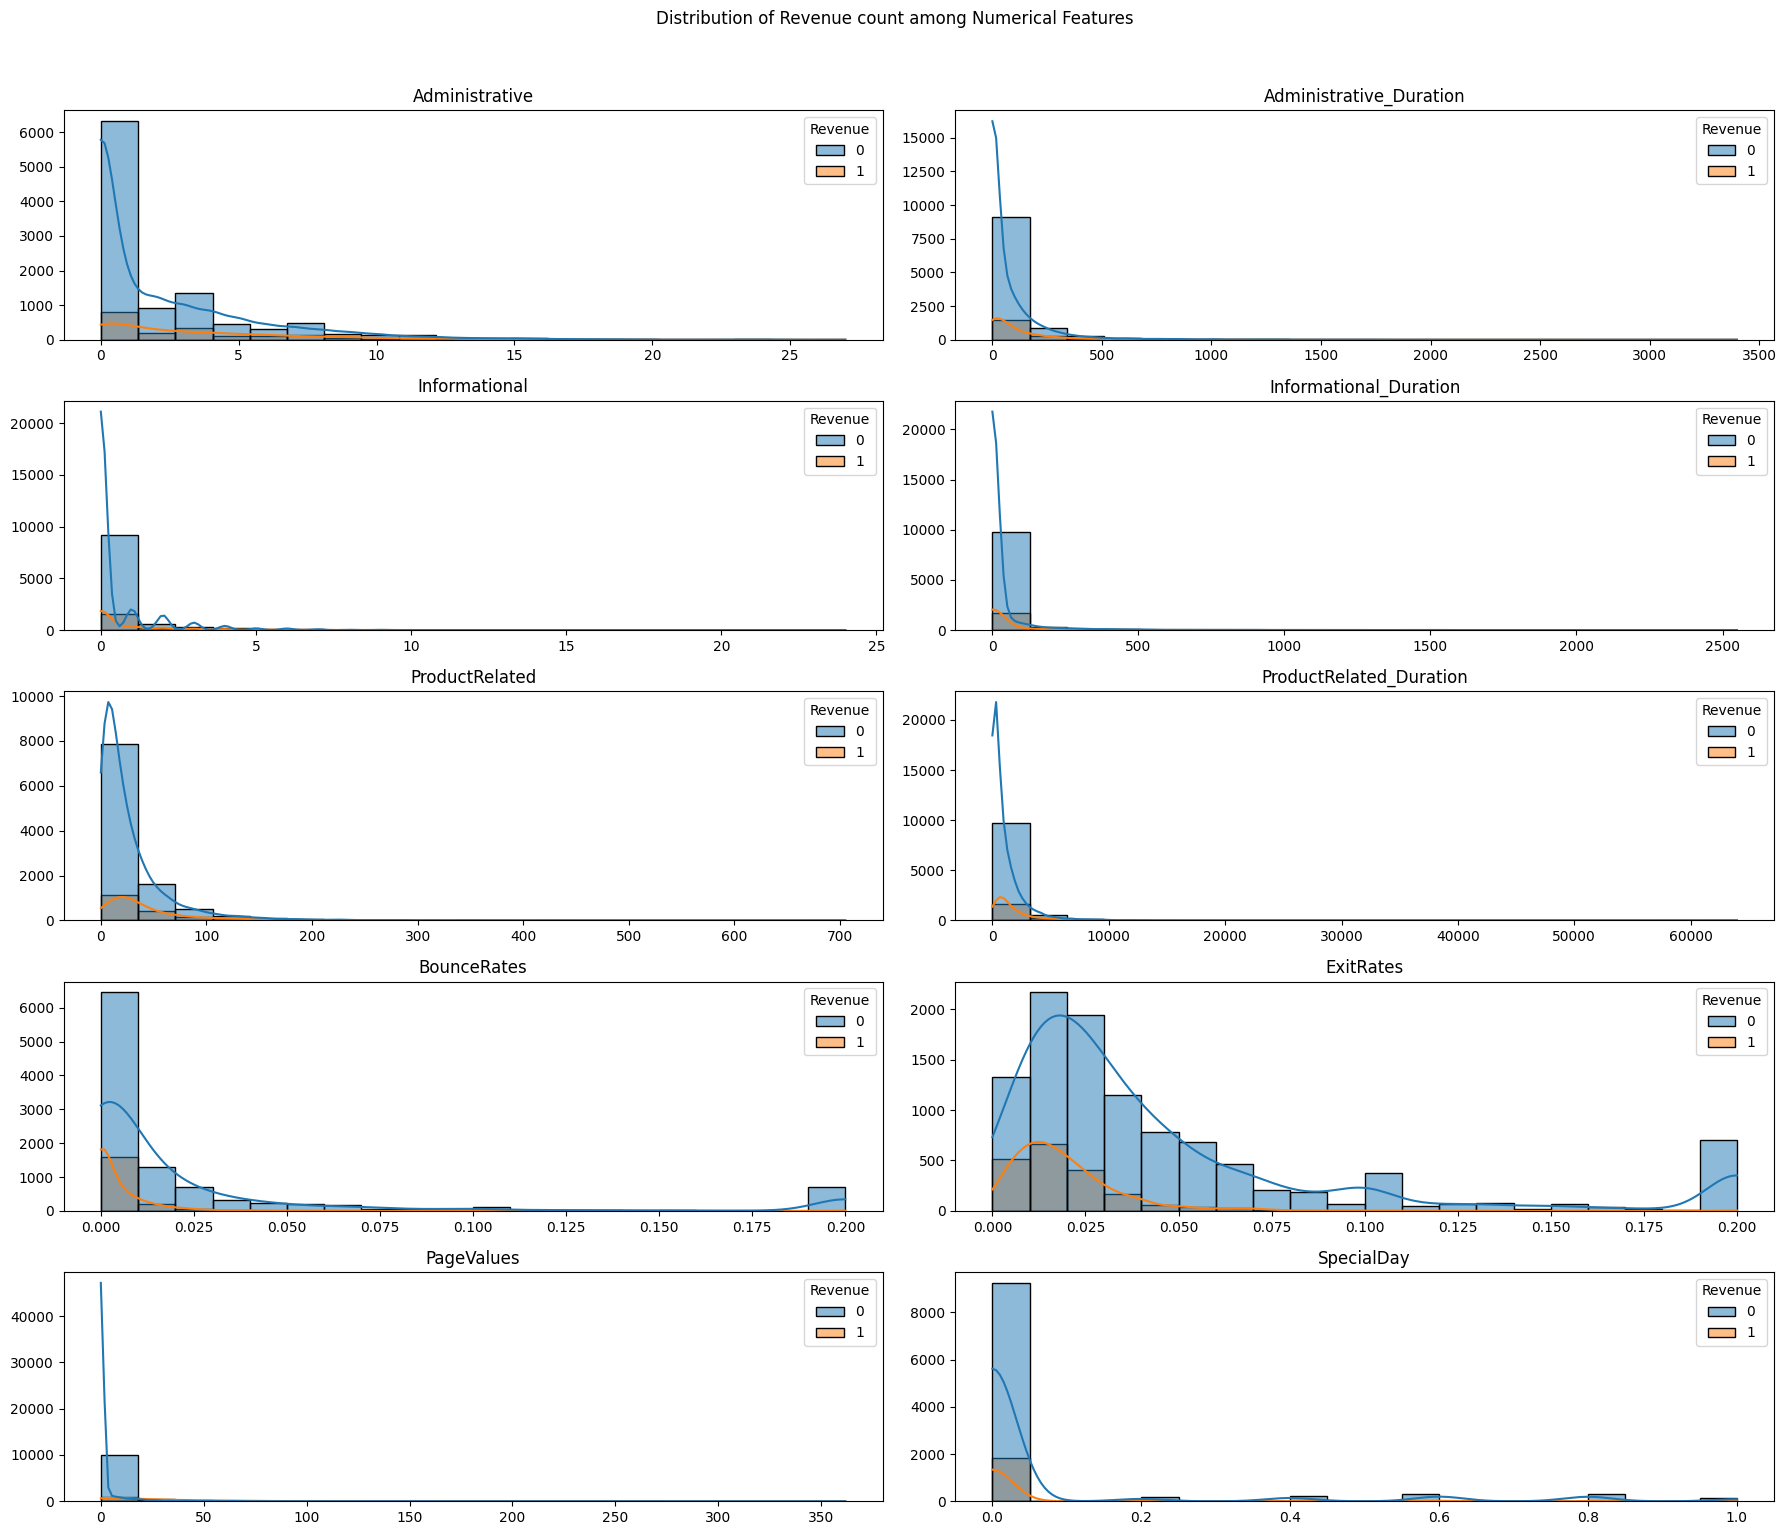

In [16]:
# Set up the layout for subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 15))
fig.suptitle('Distribution of Revenue count among Numerical Features', y=1.02)

# Plotting histograms for each numerical feature
for i, var in enumerate(num_cols):
    row, col = i // 2, i % 2
    sns.histplot(data, x=var, bins=20, kde=True, ax=axes[row, col], hue='Revenue')
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Remove empty subplots
for i in range(len(num_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

plt.show()

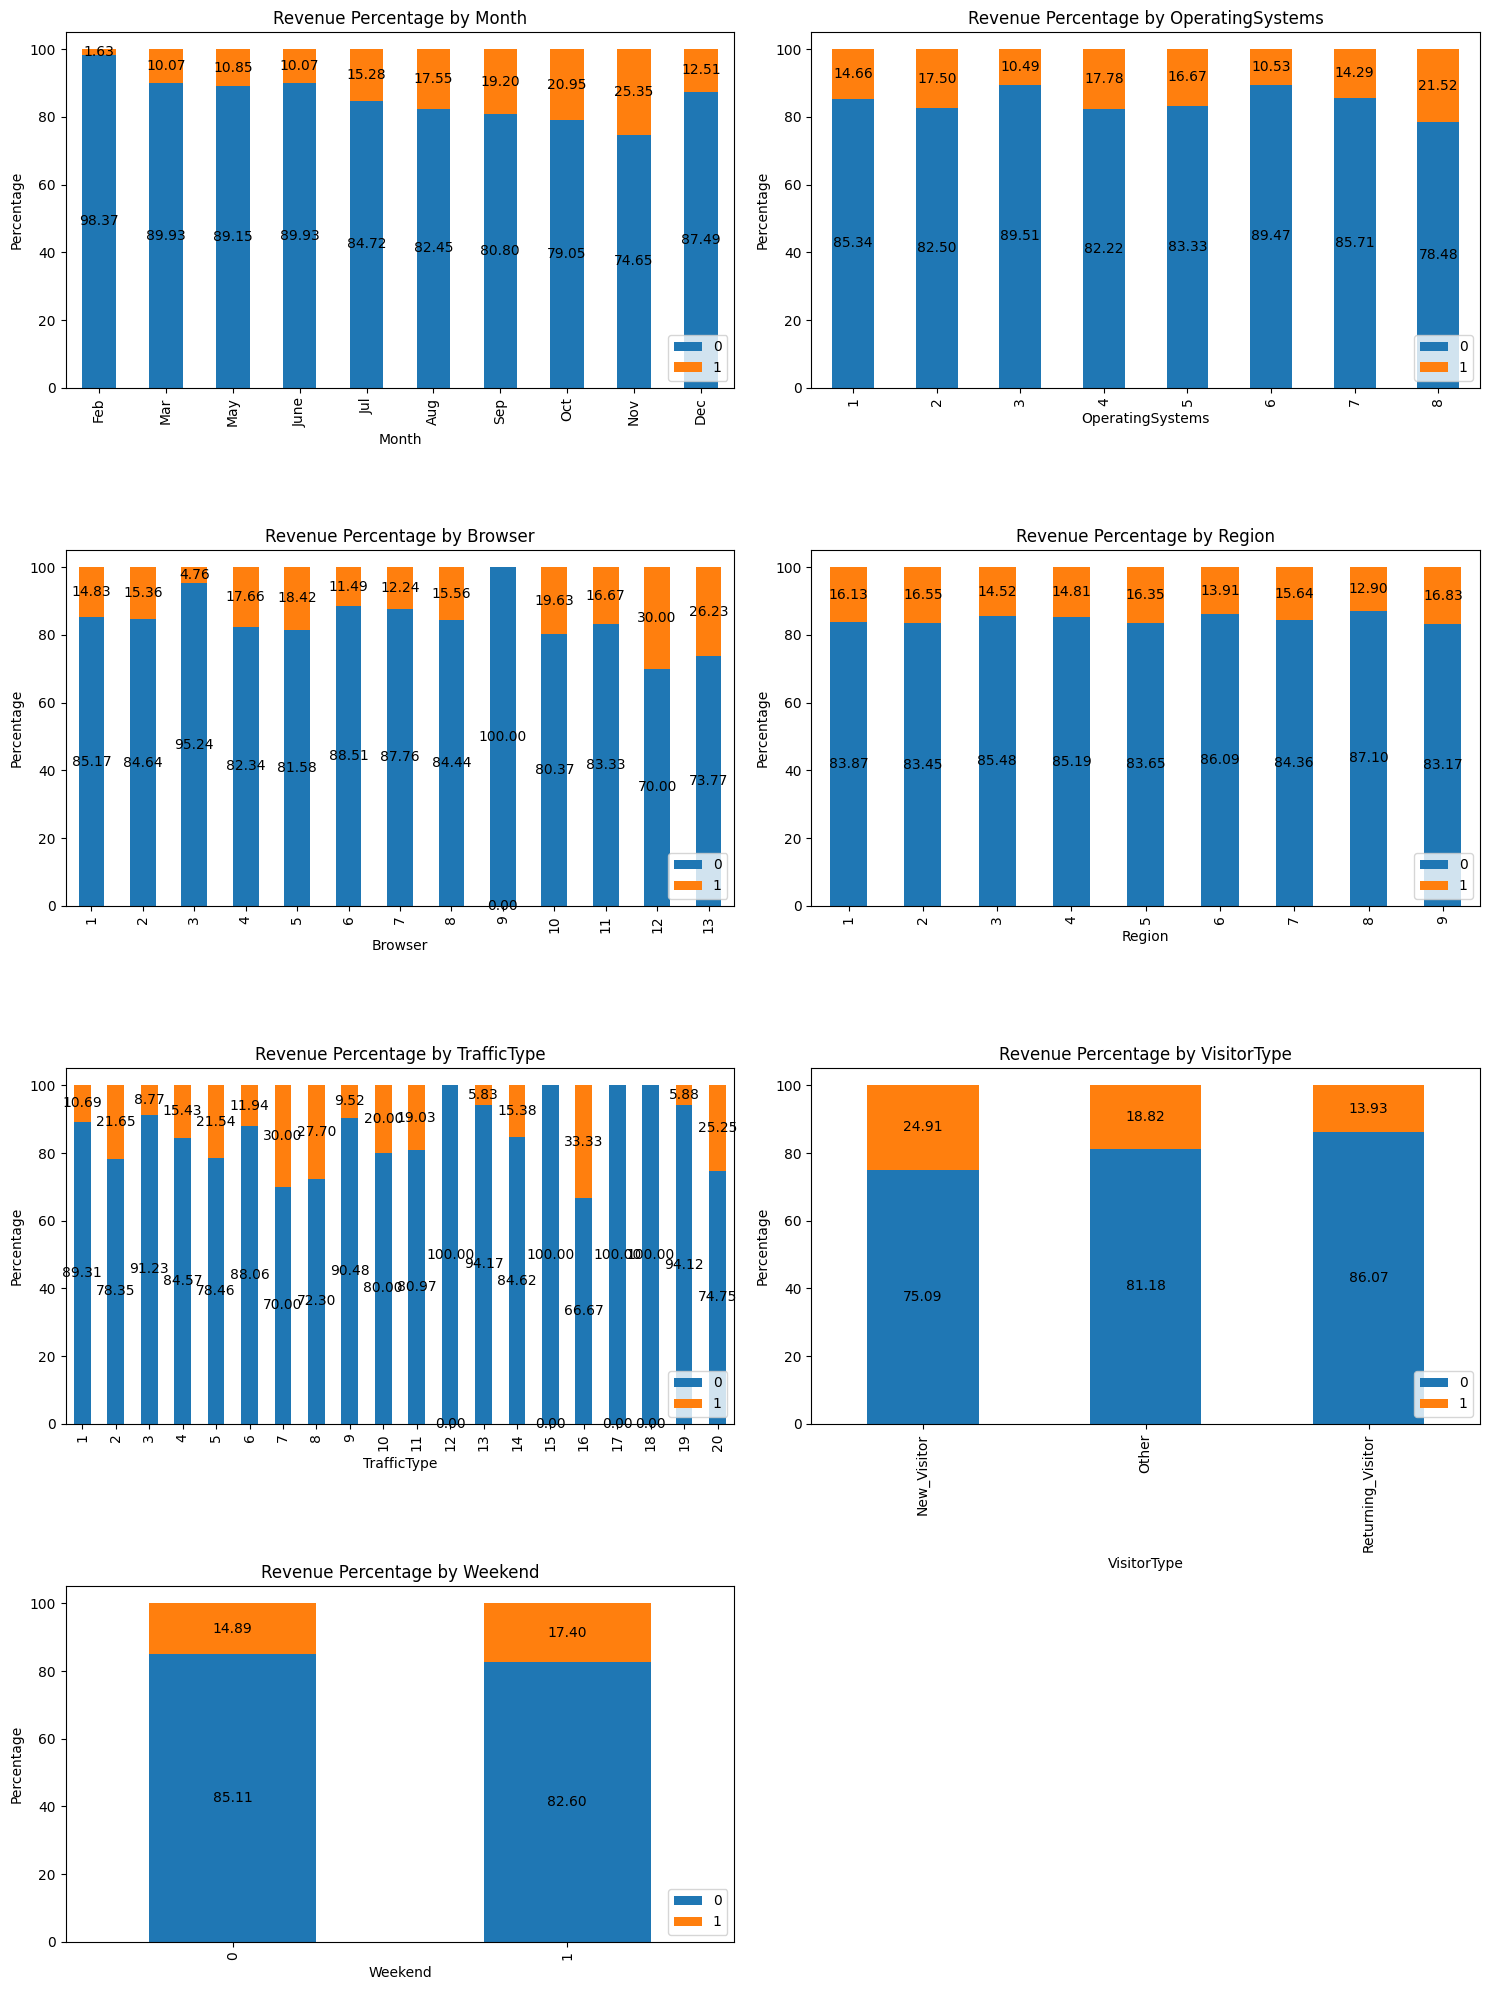

In [17]:
cat_cols.remove('Revenue')

# Calculate the number of rows and columns for the subplots
n = len(cat_cols)
ncols = 2
nrows = int(np.ceil(n / ncols))

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

for i, col in enumerate(cat_cols):
    # Group by the categorical column and 'Revenue', then calculate the size of each group
    group_sizes = data.groupby([col, 'Revenue']).size()

    # Calculate the percentage of 'Revenue' for each category
    revenue_percent = group_sizes.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

    # Unstack the 'Revenue' level in the index to create 'True' and 'False' columns
    revenue_percent = revenue_percent.unstack('Revenue')

    # Plot the percentages in the subplot
    ax = axes[i // ncols, i % ncols]
    bars = revenue_percent.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Revenue Percentage by {col}')
    ax.set_ylabel('Percentage')

    # Add data labels
    for bar in bars.containers:
        ax.bar_label(bar, label_type='center', fmt='%.2f')

    # Move the legend box to the bottom right corner
    ax.legend(loc='lower right')

# Remove empty subplots
if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## Business Intelligence to define problems
(Bi-Variate analysis)

### Visitor types and Weekend with Revenue

Text(0, 0.5, 'Visitors')

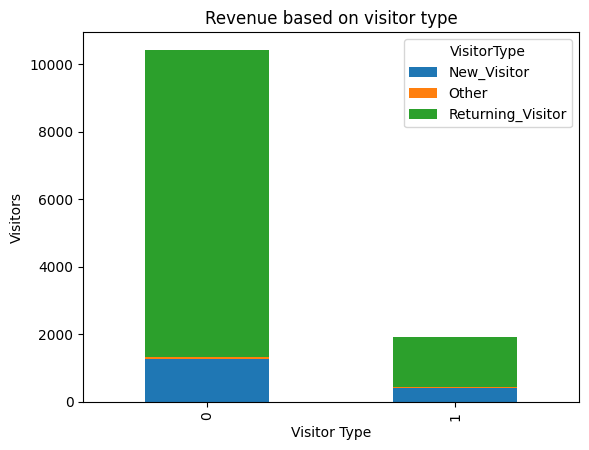

In [26]:
data.groupby(['VisitorType', 'Revenue']).size().unstack('VisitorType').plot(kind='bar', stacked=True)
plt.title('Revenue based on visitor type')
plt.xlabel('Visitor Type')
plt.ylabel('Visitors')

Text(0, 0.5, 'Visitors')

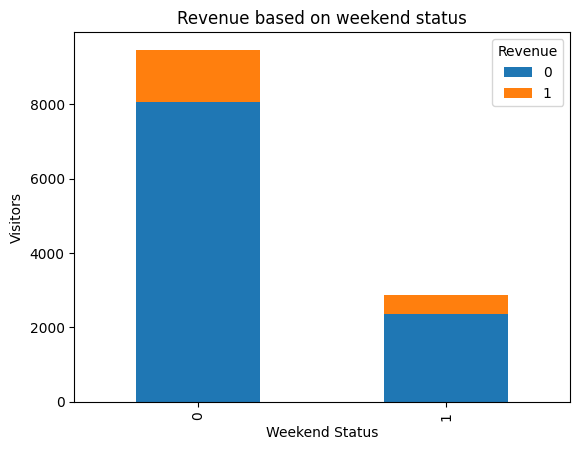

In [28]:
data.groupby(['Weekend', 'Revenue']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Revenue based on weekend status')
plt.xlabel('Weekend Status')
plt.ylabel('Visitors')

These 2 figures indicates that the majority of customers, regardless of whether they generate revenue, are repeat customers (Returning Visitor). This suggests that the company has been successful in retaining customers. However, it's clear that there's room for improvement in conversion rates. Many companies tend to concentrate on either conversion or retention, rather than striking a balance between the two. While customer retention reflects the brand's value, the lack of new customers could have a significant impact on sales and revenue growth. Most purchases were made during weekdays. This pattern could be leveraged to attract more customers to visit and make purchases over the weekend.

Recommendation:
- Engage loyal customers in conversion of other customers by offering discounts for friends joining in. For new customers making a purchase in this manner, offer discounts as well.
- Introduce time based or weekend based marketing campaign and/or promotional events to engage customers more on the weekends

### Visitor type and Month with Revenue

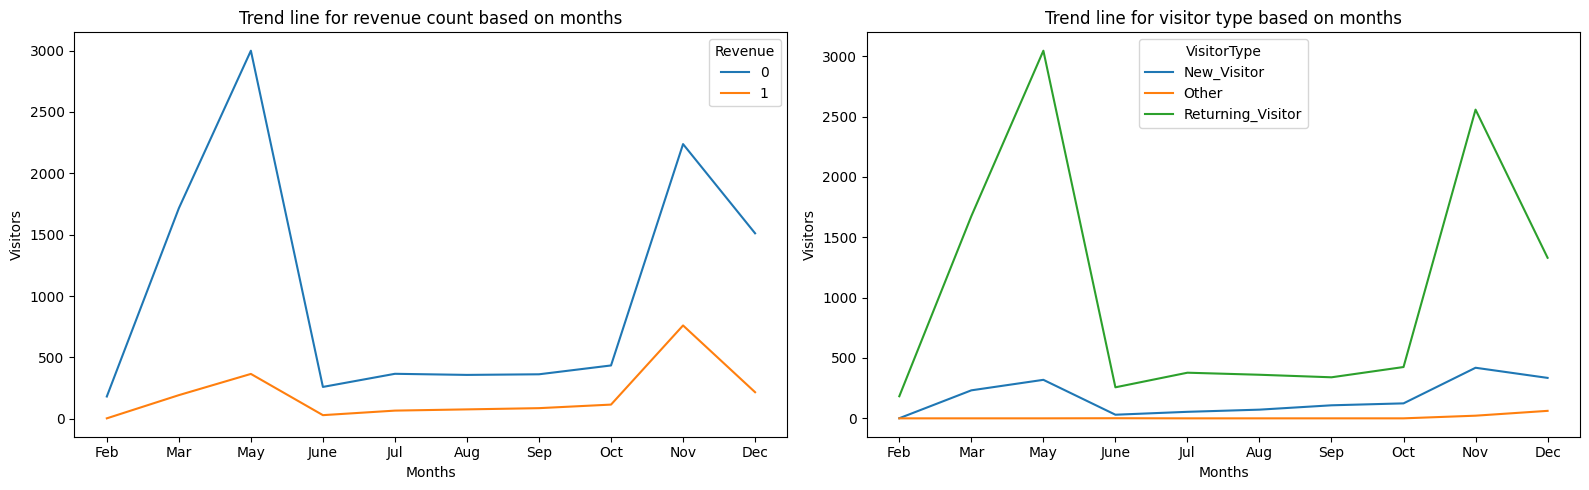

In [31]:
# Set the size of the plots
plt.figure(figsize=(16, 5))

# Plot 1: Trend line for revenue status based on months
plt.subplot(1, 2, 1)
monthly_revenue = data.groupby(['Month', 'Revenue']).size().reset_index(name='Frequency')
sns.lineplot(data=monthly_revenue, x='Month', y='Frequency', hue='Revenue')
plt.title('Trend line for revenue count based on months')
plt.xlabel('Months')
plt.ylabel('Visitors')

# Plot 2: Trend line for visitor type based on months
plt.subplot(1, 2, 2)
monthly_visitors = data.groupby(['Month', 'VisitorType']).size().reset_index(name='Frequency')
sns.lineplot(data=monthly_visitors, x='Month', y='Frequency', hue='VisitorType')
plt.title('Trend line for visitor type based on months')
plt.xlabel('Months')
plt.ylabel('Visitors')

# Display the plots
plt.tight_layout()
plt.show()

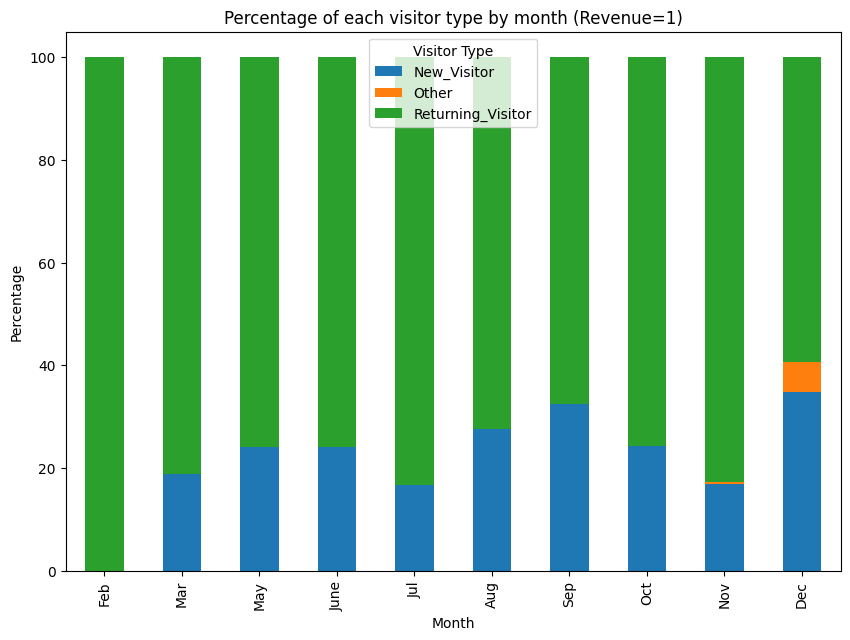

In [32]:
# Filter data where Revenue=1
data_revenue = data[data['Revenue'] == '1']

# Calculate the percentage of each visitor type by month
visitor_percentage = data_revenue.groupby(['Month', 'VisitorType']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).reset_index(name='Percentage')

# Pivot the data for the stacked bar chart
visitor_percentage_pivot = visitor_percentage.pivot(index='Month', columns='VisitorType', values='Percentage').fillna(0)

# Plot
visitor_percentage_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Percentage of each visitor type by month (Revenue=1)')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Visitor Type')
plt.show()

The figure illustrates the cyclical nature of revenue growth. Customer engagement appears to peak during the months of February, March, and May, after which it begins to decline. From June to October, the trend seems to plateau, followed by a surge in engagement as Black Friday nears. During periods of high demand, there is a significant amount of engagement, but conversion rates are notably lower since most purchases are made by returning customers (as shown in the right-hand plot). This implies that while the company has a successful loyalty program, more focus is needed on conversion. The plots suggest that many customers are browsing products but not proceeding to make a purchase.

Recommendation: Introduction of seasonal promotions with attractive offers and events, engaging more conversions and ensuring loyal customers have a beneficial part in bringing in new conversions.

### Operating system (OS), browser, region, traffic type with Revenue

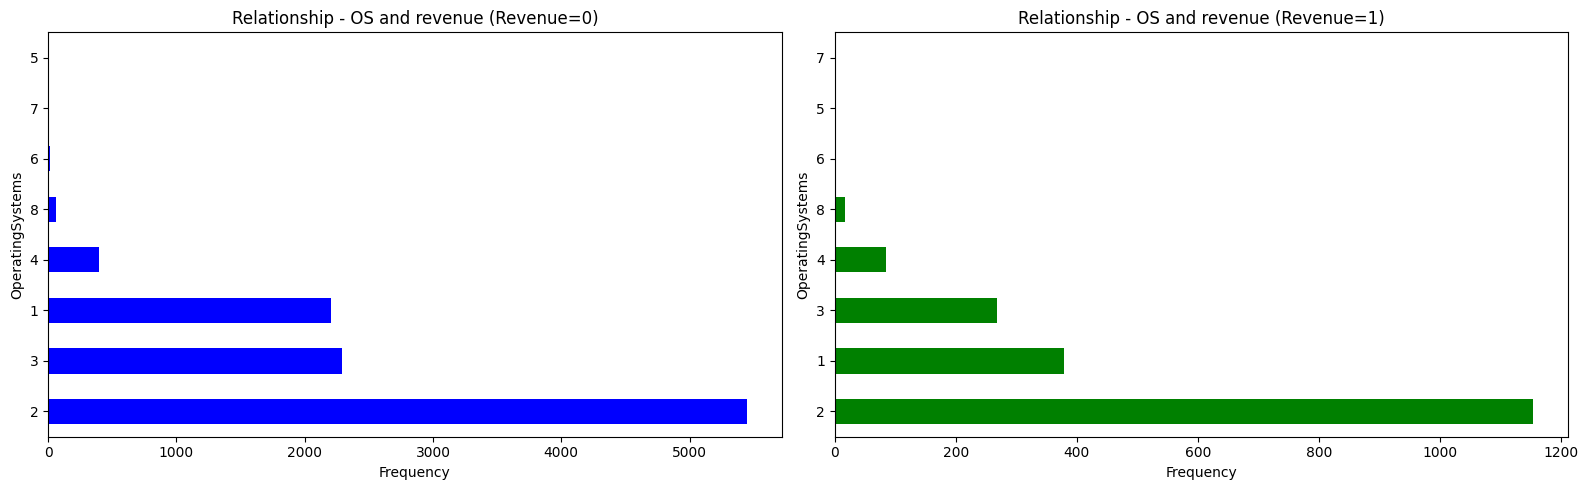

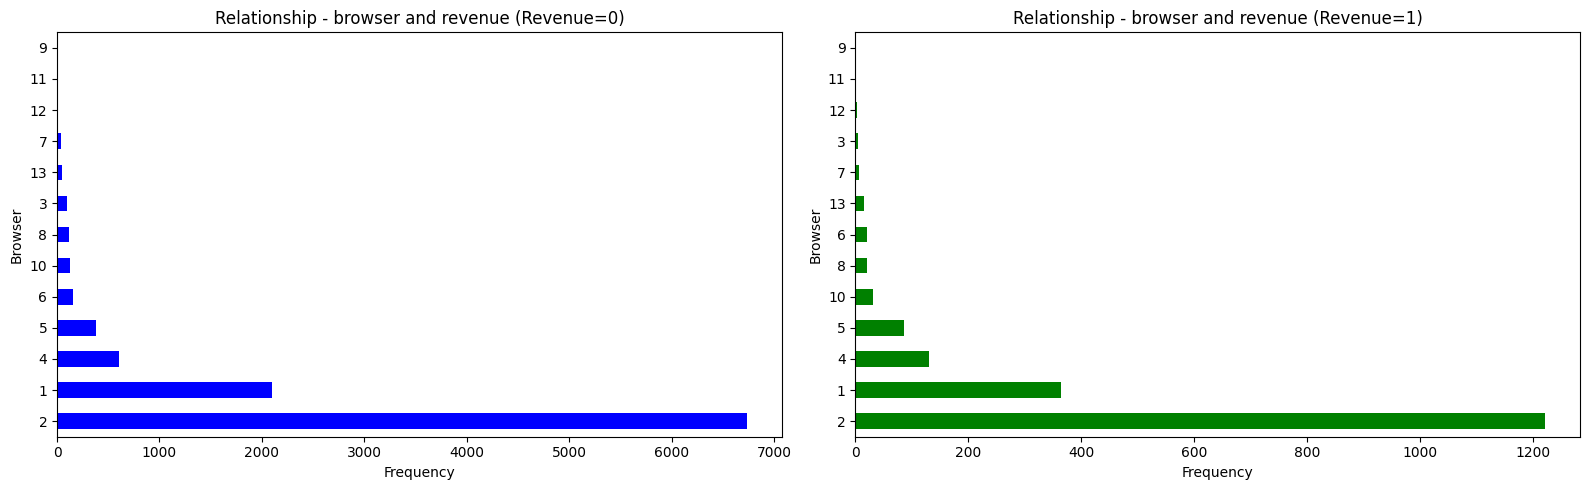

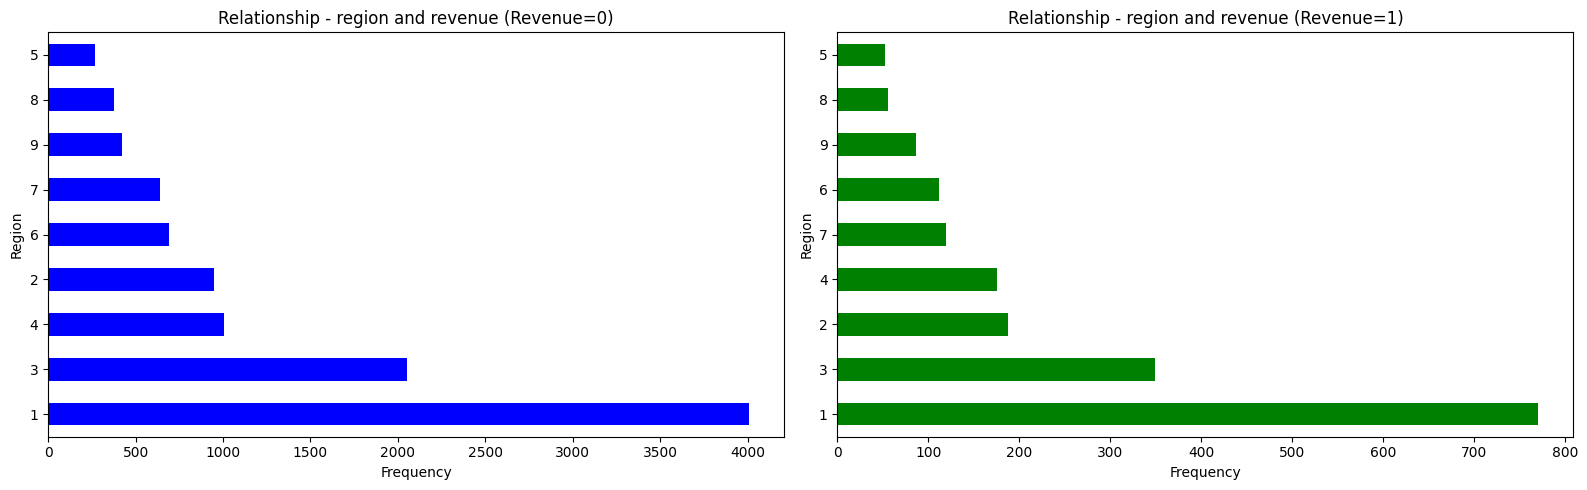

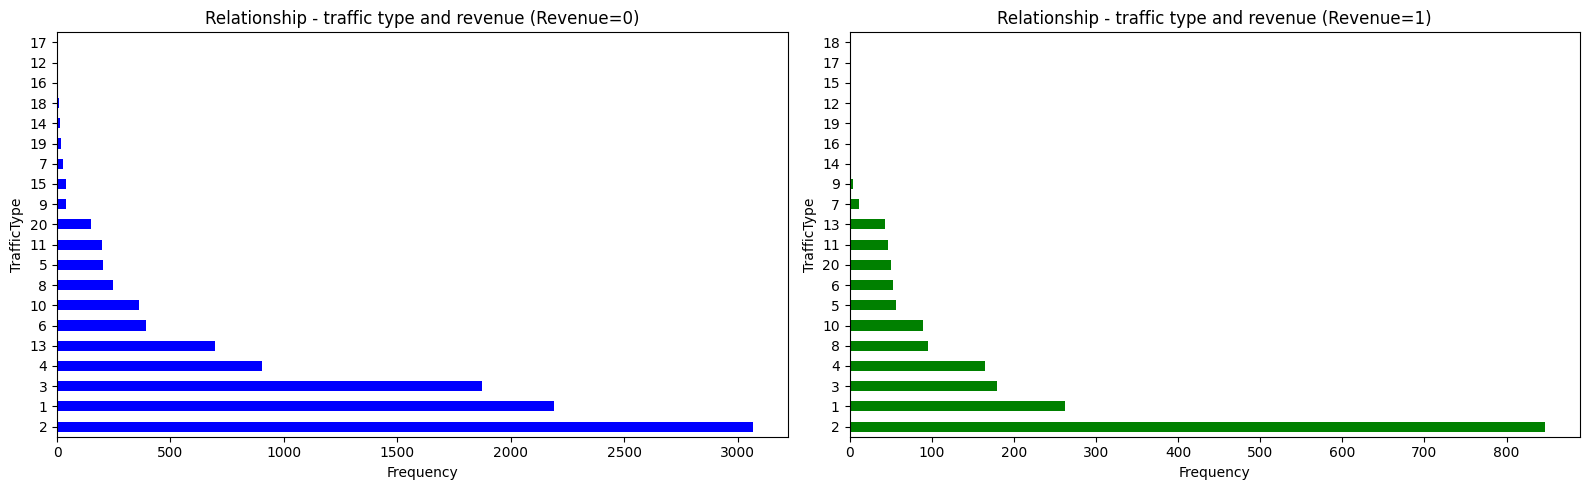

In [35]:
# Define a function to create the plots
def create_plot(data, column, title):
    # Filter data for Revenue=0 and Revenue=1
    data_0 = data[data['Revenue'] == '0']
    data_1 = data[data['Revenue'] == '1']

    # Calculate the frequency count
    freq_0 = data_0[column].value_counts().sort_values(ascending=False)
    freq_1 = data_1[column].value_counts().sort_values(ascending=False)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    # Plot for Revenue=0
    freq_0.plot(kind='barh', color='blue', ax=axs[0])
    axs[0].set_title(title + ' (Revenue=0)')
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel(column)

    # Plot for Revenue=1
    freq_1.plot(kind='barh', color='green', ax=axs[1])
    axs[1].set_title(title + ' (Revenue=1)')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel(column)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Relationship between OS and Revenue
create_plot(data, 'OperatingSystems', 'Relationship - OS and revenue')

# Relationship between Browser and Revenue
create_plot(data, 'Browser', 'Relationship - browser and revenue')

# Relationship between Region and Revenue
create_plot(data, 'Region', 'Relationship - region and revenue')

# Relationship between TrafficType and Revenue
create_plot(data, 'TrafficType', 'Relationship - traffic type and revenue')

The figure provides insights into the relationship between revenue growth and various factors such as the operating system, browser, region, and traffic sources.
- In terms of operating systems, "2" outperforms others in both visitor count and conversion rate. However, "1" and "3" follow in the rankings. The lower performance of other sources could indicate that the website may not be user-friendly on those platforms, or those platforms may be niche and not widely used by customers.
- When it comes to browsers, "2" tops the list followed by "1", "4", and "5" in both visitor count and conversion rate, suggesting similar reasoning as with operating systems.
- In terms of regions, "1" significantly outperforms others, followed by "3" in both visitor count and conversion rate. The substantial lead of "1" suggests effective marketing reach within this region. However, there is potential for improvement in other regions.
- Regarding traffic types, "2" leads the pack, followed by "1" and "3", indicating the influence of Google SEO optimization. However, with only 45% of these visits resulting in revenue, there is room for improvement in SEO and/or Google/Social media Ads. This data suggests a need for strategies that balance both visitor engagement and conversion rates.

Recommendation:
- Ensuring smooth technical operations with enhanced and personalized UI experience supported by all browsers and OS.
- Adapting similar model based approach as Region 1 over other regions by customizing the same according to social and cultural drivers. Personalizing ads and reach by A/B testing to ensure the reach and conversion / retention shows significant growth among all regions.
- Ensuring optimization of SEO from different sources such as Google, Bing, Baidu etc. Working with region and age specific A/B testing within Google Ads, Facebook Ads or other sources.

### Exit Rates and Bounce Rates

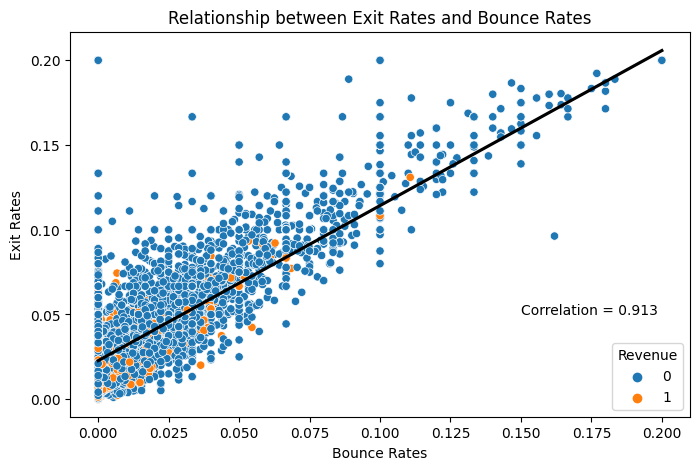

In [36]:
from scipy.stats import pearsonr

# Calculate the correlation
corr, _ = pearsonr(data['BounceRates'], data['ExitRates'])
corr = round(corr, 3)

# Create the plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=data)
sns.regplot(x='BounceRates', y='ExitRates', data=data, scatter=False, color='black')
plt.title('Relationship between Exit Rates and Bounce Rates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.text(0.15, 0.05, 'Correlation = ' + str(corr))
plt.show()

Bounce rate refers to the overall percentage of single engagement sessions, while exit rate pertains to the percentage of exits from a specific page. The former is calculated by dividing the total number of one-page visits by the total number of entrance visits, while the latter is calculated by dividing the total number of exits from a page by the total number of visits to that page. A key distinction between these two closely related metrics is that exit rate pertains to the overall percentage of visitors involved in the last session, while bounce rates account for the percentage of visitors involved in a single session. Therefore, in the case of bounce rate, prior activity is not taken into account. As a result, all bounces logically constitute exits, but the reverse is not necessarily true.

[A high bounce rate could signal issues with user satisfaction](https://contentsquare.com/blog/what-bounce-rate-says-about-your-customer-experience/) due to a variety of factors, such as an unfriendly website user interface, extremely slow throughput, or other technical issues. [A high exit rate could indicate underperforming areas in conversion funnels](https://www.americaneagle.com/insights/blog/post/2021/05/11/conversion-rate-optimization-understanding-your-exit-rate), highlighting areas ripe for optimization. If customers are leaving, then ultimately no purchases are being made. Assuming there is indeed no error in these 2 indexes, we could explore ways to optimize bounce rates and exit rates to ensure sales are saved and customer loyalty is secured.

Recommendation:
- Optimization of the landing product pages by means such as making the add to cart option stand out, UI friendly, short descriptions and icons wherever needed, color impactfulness and ensuring that the purchase experience is as smooth as possible. Another important aspect is to ensure not to create an illusion of low price until put in the cart, i.e. the shipping fees could create a significant impact over exit rates. Hence it is always better to exhibit the true cost right from the start.
- Categorizing email retargeting based on funneling as mentioned with the previous dataset, so that there exists a personalized touch to the mail. Personalization brings in large scale loyalty and in turn better retention.
- Introducing pop-ups offering qualitative discounts or personalized queries when a customer bounces multiple times and/or tries to leave the website.